To obtain the data with the rent prices, we will do web-scrapping from Idealista, a real estate platform that operates primarily in Spain. By scraping data from Idealista, we can access up-to-date information on rental prices across different regions.

We encountered some access problems to do web-scrapping directly from the url, so we extracted the html for the tables that contained the information that we wanted as of 29/04

In [9]:
import os
from bs4 import BeautifulSoup
import pandas as pd
import re

In [10]:
def extract_prices_from_file(html_file_path, city_name):
    with open(html_file_path, "r", encoding="utf-8") as file:
        html = file.read()

    soup = BeautifulSoup(html, "html.parser")
    rows = soup.select("tr.table__row")

    data = []
    for row in rows:
        cells = row.find_all("td")
        if len(cells) >= 2:
            date = cells[0].get_text(strip=True)
            raw_price = cells[1].get_text(strip=True)
            match = re.search(r"[\d,.]+", raw_price)
            price_text = match.group().replace(",", ".")
            data.append({
                    "date": date,
                    "price": price_text,
                    "city": city_name
                })

    return pd.DataFrame(data)


In [11]:
path = os.getcwd()

# Define the directory containing the HTML files
directory = os.path.join(path, "data/html_files")

In [12]:
print(path)

c:\Users\silvi\OneDrive\Escritorio\DTU\SEGUNDO MASTER\Social Data Analysis and Visualization\social_data_assignments\final_project


In [13]:
files = [table for table in os.listdir(directory) if table.endswith(".html")]
names = [table.split("_")[2].split(".")[0] for table in files]

FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: 'c:\\Users\\silvi\\OneDrive\\Escritorio\\DTU\\SEGUNDO MASTER\\Social Data Analysis and Visualization\\social_data_assignments\\final_project\\data/html_files'

In [ ]:
# Create a DataFrame for each file
dataframes = []
for i, file in enumerate(files):
    df = extract_prices_from_file(directory+"/"+file, names[i])
    print(f"Extracted {len(df)} rows from {file}")
    dataframes.append(df)

# Concatenate all DataFrames into one
df_all = pd.concat(dataframes, ignore_index=True)



Extracted 231 rows from table_prices_palma.html
Extracted 231 rows from table_prices_valencia.html
Extracted 231 rows from table_prices_barcelona.html
Extracted 231 rows from table_prices_madrid.html


In [ ]:
df_all = df_all[df_all["price"] != "."]
df_all["price"] = df_all["price"].astype(float)

In [ ]:
# save the DataFrame to a CSV file
#output_file = os.path.join(path, "data_clean", "prices.csv")
#df_all.to_csv(output_file, index=False)

In [36]:
df_prices = pd.read_csv("data_clean/prices.csv")
df_prices.head(10)

,date,price,city
0,Marzo 2025,17.3,palma
1,Febrero 2025,17.1,palma
2,Enero 2025,17.1,palma
3,Diciembre 2024,17.2,palma
4,Noviembre 2024,17.0,palma
5,Octubre 2024,17.1,palma
6,Septiembre 2024,17.3,palma
7,Agosto 2024,17.3,palma
8,Julio 2024,17.2,palma
9,Junio 2024,16.7,palma


In [29]:
df_bcn = pd.read_csv("data_clean/bcn_filt_bnb.csv")
df_mad = pd.read_csv("data_clean/mad_filt_bnb.csv")
df_mall = pd.read_csv("data_clean/mall_filt_bnb.csv")

print(df_bcn.columns)
print(df_mad.columns)
print(df_mall.columns)


Index(['id', 'name', 'host_name', 'host_since', 'neighbourhood', 'district',
       'latitude', 'longitude', 'room_type', 'price', 'last_review', 'license',
       'is_registered', 'is_registered_bnb'],
      dtype='object')
Index(['id', 'name', 'host_name', 'host_since', 'neighbourhood', 'district',
       'latitude', 'longitude', 'room_type', 'price', 'last_review', 'license',
       'is_registered', 'is_registered_bnb'],
      dtype='object')
Index(['id', 'name', 'host_name', 'host_since', 'neighbourhood', 'district',
       'latitude', 'longitude', 'room_type', 'price', 'last_review', 'license',
       'is_registered', 'is_registered_bnb'],
      dtype='object')


In [43]:
df_bcn.head(10)

,id,name,host_name,host_since,neighbourhood,district,latitude,longitude,room_type,price,last_review,license,is_registered,is_registered_bnb,year
0,18674,Huge flat for 8 people close to Sagrada Familia,Mireia Maria,2010-01-19,la Sagrada Família,Eixample,41.405560,2.17262,Entire home/apt,$179.00,1970-01-01 00:00:00.000002024,HUTB-002062,True,True,1970
1,23197,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",Etain (Marnie),2010-03-09,el Besòs i el Maresme,Sant Martí,41.412432,2.21975,Entire home/apt,$251.00,1970-01-01 00:00:00.000002025,HUTB005057,False,True,1970
2,32711,Sagrada Familia area - Còrsega 1,Nick,2010-05-31,el Camp d'en Grassot i Gràcia Nova,Gràcia,41.405660,2.17015,Entire home/apt,$104.00,1970-01-01 00:00:00.000002025,HUTB-001722,True,True,1970
3,34241,Stylish Top Floor Apartment - Ramblas Plaza Real,Andres,2010-01-24,el Barri Gòtic,Ciutat Vella,41.380620,2.17517,Entire home/apt,$157.00,1970-01-01 00:00:00.000002024,Exempt,True,True,1970
4,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,Andres,2010-01-24,el Barri Gòtic,Ciutat Vella,41.379780,2.17623,Entire home/apt,$401.00,1970-01-01 00:00:00.000002025,HUTB-150671,False,True,1970
5,40983,Soho Colonial Eclectic Apartment,Joaquin,2010-07-22,la Dreta de l'Eixample,Eixample,41.396310,2.16832,Entire home/apt,$149.00,1970-01-01 00:00:00.000002025,HUTB-001282,True,True,1970
6,41952,Modern Apartment - Sagrada Familia,Teresa,2010-07-28,el Camp d'en Grassot i Gràcia Nova,Gràcia,41.405680,2.16943,Entire home/apt,$199.00,1970-01-01 00:00:00.000002024,HUTB-003549,True,True,1970
7,320506,The Loft Barcelona,The Loft,2012-01-23,el Poble Sec,Sants-Montjuïc,41.371950,2.16936,Entire home/apt,$122.00,1970-01-01 00:00:00.000002024,hutb-004655,False,True,1970
8,330723,SUNNY ROOM WITH BALCONY,Morpheus Stays X JuanMi,2012-02-02,el Raval,Ciutat Vella,41.375710,2.17118,Private room,$21.00,1970-01-01 00:00:00.000002025,NaN,False,False,1970
9,330766,Urquinaona tranquilo y céntrico,Virginia,2012-02-02,la Dreta de l'Eixample,Eixample,41.390760,2.17503,Entire home/apt,$123.00,1970-01-01 00:00:00.000002025,HUTB-003905,True,True,1970


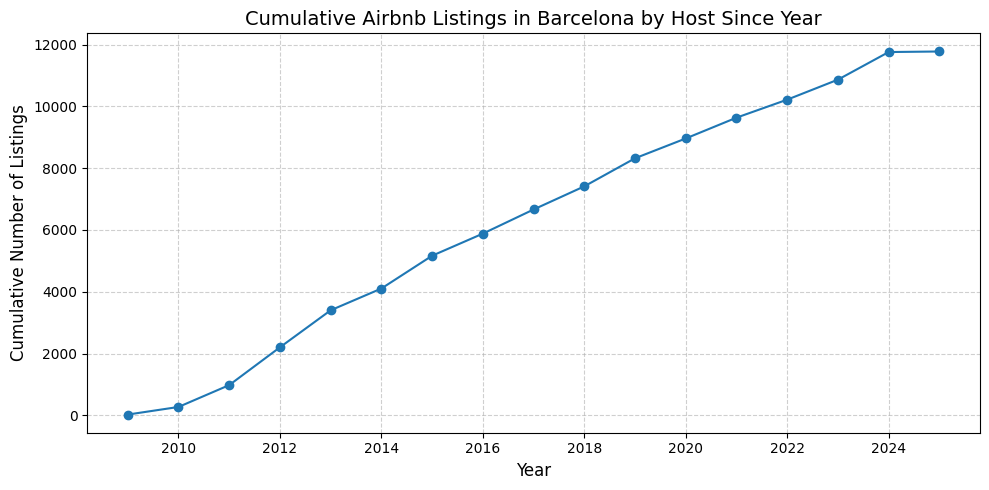

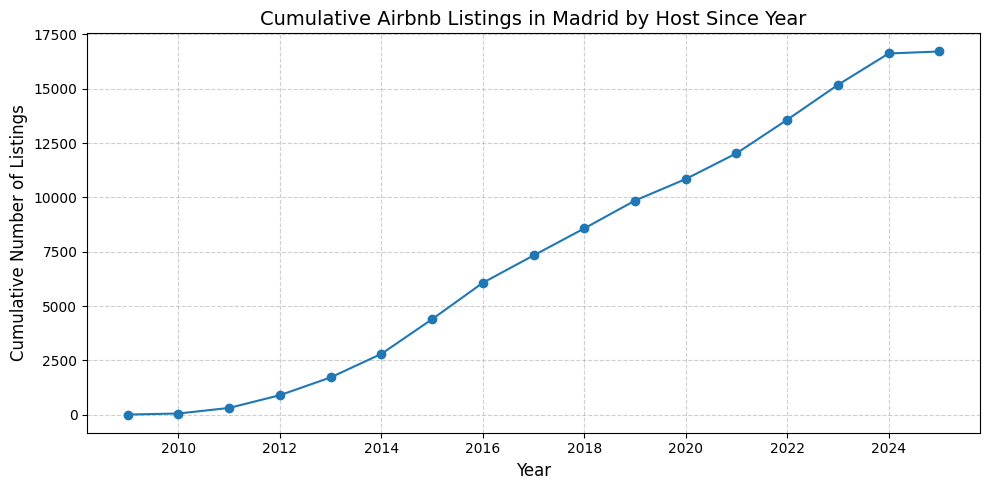

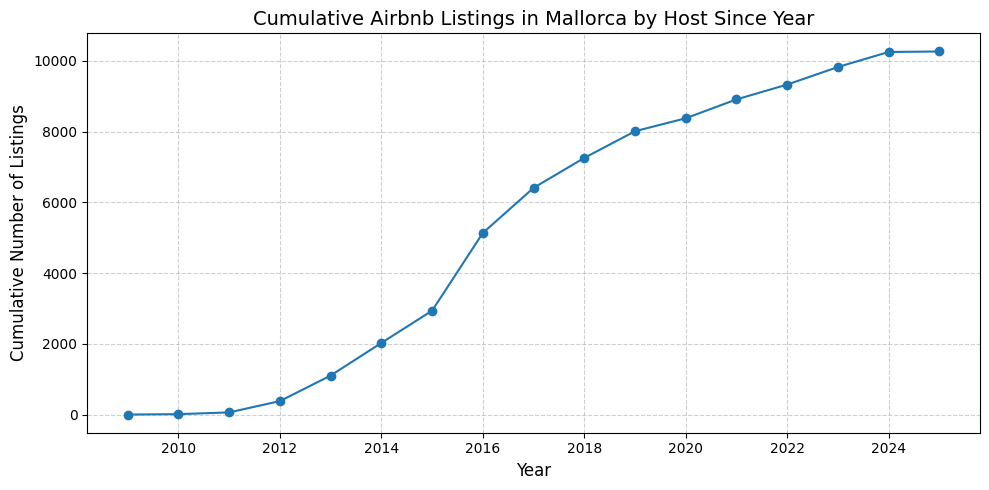

[    2    14    63   383  1105  2027  2938  5135  6409  7256  8010  8377
  8910  9329  9826 10250]


In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Diccionario con tus dataframes
datasets = {
    'Barcelona': df_bcn,
    'Madrid':     df_mad,
    'Mallorca':   df_mall
}

for city, df in datasets.items():
    # 1. Copiar el dataframe
    data = df.copy()
    
    # 2. Asegurarnos de que 'host_since' sea datetime
    data['host_since'] = pd.to_datetime(data['host_since'], errors='coerce')
    
    # 3. Extraer el año
    data['year'] = data['host_since'].dt.year
    
    # 4. Contar cuántos listings únicos aparecieron cada año
    yearly_counts = (
        data
        .dropna(subset=['year'])
        .groupby('year')['id']
        .nunique()
        .sort_index()
    )
    
    # 5. Sumar acumulativamente
    cumulative_counts = yearly_counts.cumsum()
    
    # 6. Plot
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(cumulative_counts.index, cumulative_counts.values, marker='o')
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Cumulative Number of Listings', fontsize=12)
    ax.set_title(f'Cumulative Airbnb Listings in {city} by Host Since Year', fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()



airbnbs = cumulative_counts.values[0:-1]
print(airbnbs)

In [77]:
import pandas as pd

# 1. Filter to Barcelona
barcelona_data = df_prices[df_prices['city'].str.lower() == 'barcelona'].copy()

# 2. Extract the year from the 'date' column (e.g. "Marzo 2018" → 2018)
barcelona_data['Year'] = barcelona_data['date'].str.split().str[-1].astype(int)
barcelona_data = barcelona_data.sort_values(by='Year')

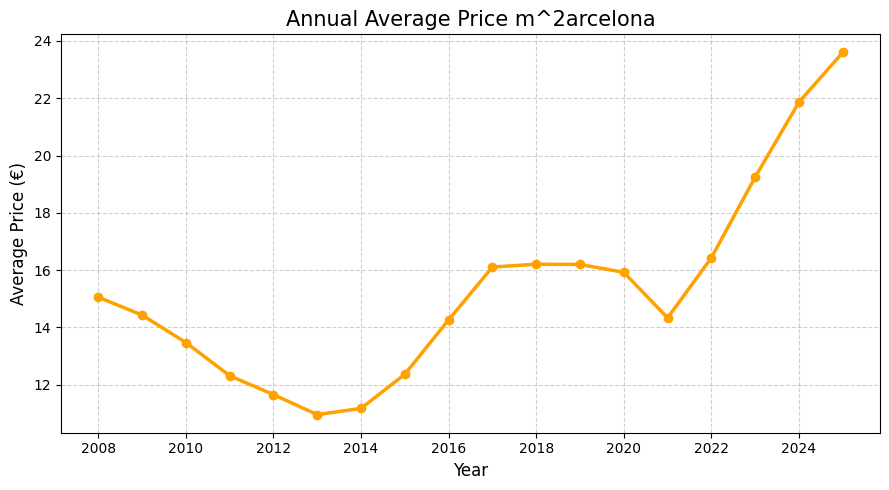

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# ---------- 2. Parse the "date" column ----------
# Spanish month → two‑digit month number
month_map = {
    'Enero': '01', 'Febrero': '02', 'Marzo': '03', 'Abril': '04',
    'Mayo': '05', 'Junio': '06', 'Julio': '07', 'Agosto': '08',
    'Septiembre': '09', 'Octubre': '10', 'Noviembre': '11', 'Diciembre': '12'
}

# Split "Marzo 2025" → ["Marzo", "2025"]
split_date       = df_prices['date'].str.split()
df_prices['month_name'] = split_date.str[0]
df_prices['year']       = split_date.str[1].astype(int)
df_prices['month_num']  = df_prices['month_name'].map(month_map)

# Build a real datetime at the 1st of each month
df_prices['date_parsed'] = pd.to_datetime(
    df_prices['year'].astype(str) + '-' + df_prices['month_num'] + '-01',
    format='%Y-%m-%d',
    errors='coerce'
)

# ---------- 3. Clean price ----------
df_prices['price'] = pd.to_numeric(df['price'], errors='coerce')

# ---------- 4. Keep only Barcelona rows ----------
df_bcn = df_prices[df_prices['city'].str.lower() == 'barcelona'].dropna(subset=['price'])

# ---------- 5. Annual average price ----------
annual_avg = (
    df_bcn
    .groupby('year')['price']
    .mean()
    .reset_index(name='avg_price')
    .sort_values('year')
)

# ---------- 6. Plot ----------
plt.figure(figsize=(9, 5))
plt.plot(annual_avg['year'], annual_avg['avg_price'],
         marker='o', linestyle='-', linewidth=2.5, color='#FFA200')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Price (€)', fontsize=12)
plt.title('Annual Average Price m^2Blona', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.6)

# Force integer ticks on the x‑axis
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


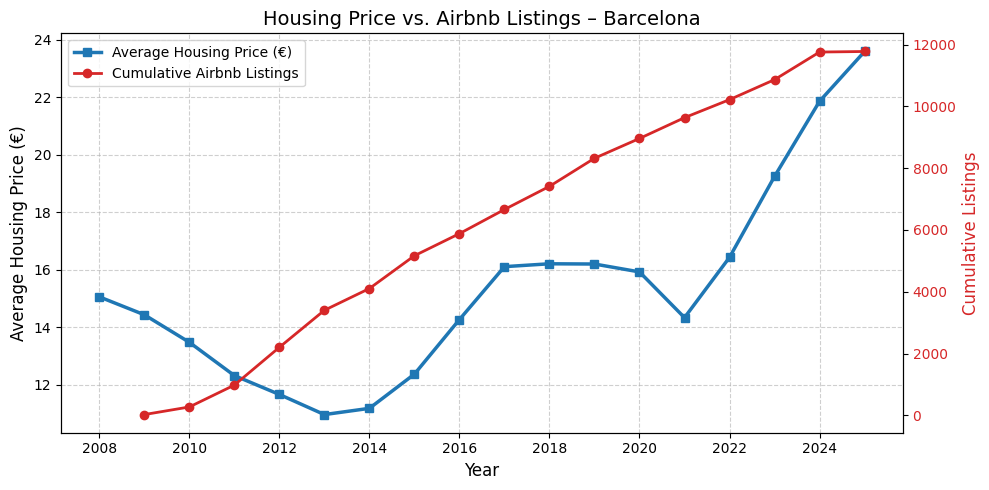

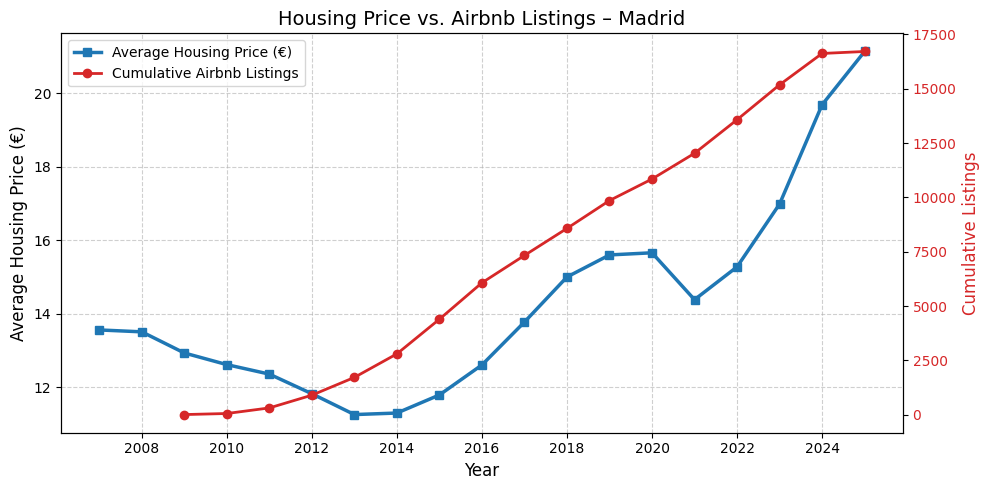

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# ─────────────────────────────────────────────────────────────
# 1. CREA UN DICCIONARIO CON EL CUMULATIVO POR CIUDAD ─────────
#    (ya lo calculabas en tu bucle; lo guardamos aquí)
cumulative_dict = {}
for city, df in datasets.items():
    tmp = df.copy()
    tmp['host_since'] = pd.to_datetime(tmp['host_since'], errors='coerce')
    yearly = (
        tmp.dropna(subset=['host_since'])
           .groupby(tmp['host_since'].dt.year)['id']
           .nunique()
           .sort_index()
    )
    cumulative_dict[city] = yearly.cumsum()          # Series con índice = year

# ─────────────────────────────────────────────────────────────
# 2. CREA UN DICCIONARIO CON PRECIO MEDIO ANUAL POR CIUDAD ───
price_frames = []
for city in ['Barcelona', 'Madrid', 'Mallorca']:
    subset = (
        df_prices[df_prices['city'].str.lower() == city.lower()]
        .copy()
        .dropna(subset=['price'])
    )
    annual_avg = (
        subset.groupby('year')['price']
              .mean()
              .reset_index()
              .assign(city=city)
    )
    annual_avg = annual_avg.rename(columns={'price': 'avg_price'})  # ← renombra después

    price_frames.append(annual_avg)

prices_dict = {
    city: g.set_index('year')['avg_price']
    for city, g in pd.concat(price_frames).groupby('city')
}

# ─────────────────────────────────────────────────────────────
# 3. FUNCIÓN PARA PLOT CON EJE DOBLE ──────────────────────────
def dual_axis_plot(city, price_series, cumulative_series):
    """
    Dibuja precio medio (izquierda) y acumulativo Airbnb (derecha)
    para una ciudad dada.
    """
    fig, ax_left = plt.subplots(figsize=(10, 5))

    # ---- Eje Y izquierdo: Precio medio ----
    ax_left.plot(price_series.index,
                 price_series.values,
                 marker='s', linewidth=2.5,
                 label='Average Housing Price (€)')
    ax_left.set_xlabel('Year', fontsize=12)
    ax_left.set_ylabel('Average Housing Price (€)', fontsize=12)
    ax_left.grid(True, linestyle='--', alpha=0.6)
    ax_left.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    # ---- Eje Y derecho: Cumulativo Airbnb ----
    ax_right = ax_left.twinx()
    ax_right.plot(cumulative_series.index,
                  cumulative_series.values,
                  marker='o', linewidth=2,
                  color='tab:red',
                  label='Cumulative Airbnb Listings')
    ax_right.set_ylabel('Cumulative Listings', fontsize=12, color='tab:red')
    ax_right.tick_params(axis='y', labelcolor='tab:red')

    # ---- Título & leyenda combinada ----
    plt.title(f'Housing Price vs. Airbnb Listings – {city}', fontsize=14)
    lines_l, labels_l = ax_left.get_legend_handles_labels()
    lines_r, labels_r = ax_right.get_legend_handles_labels()
    ax_left.legend(lines_l + lines_r, labels_l + labels_r, loc='upper left')

    plt.tight_layout()
    plt.show()

# ─────────────────────────────────────────────────────────────
# 4. LLAMA LA FUNCIÓN PARA CADA CIUDAD ────────────────────────
for city in cumulative_dict.keys():
    if city in prices_dict:          # solo si tenemos su serie de precios
        dual_axis_plot(
            city,
            prices_dict[city],
            cumulative_dict[city]
        )

#ddd